## Autoimmune Tweets using the mostly preprocessed file from R and testing on Stemmed Tweets with 8 categories of autoimmune diseases
Those being: 
0:Leukemia, 1: Fibromyalgia, 2:Kidney Disease, 3: Celiac Disease, 4: MS, 5: Hashimoto, 6: RA, 7: Chron's Disease

Tweets were taken from respective diseases in early December 2019 from 13 to 119 
tweets for each disease, as many as were found that weren't mostly marketing, using ''<disease> treatment' in the search

In [3]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(47) 
 


In [4]:
reviews = pd.read_csv('LemmaPythonRead.csv', encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [5]:
reviews.head()


,LemmatizedTweets,StemmedTweets,AutoImmuneDisorder
0,unknown research unknownresearch the center fo...,unknown research\r\nunknownresearch\r\nthe cen...,Celiac_Disease
1,lynn barter abc mc lbarter · dec reply to thre...,lynn barter abc mc\r\nlbarter\r\n·\r\ndec \r\n...,Celiac_Disease
2,theona layne theonawrites · dec unknown diseas...,theona layne\r\ntheonawrites\r\n·\r\ndec \r\nu...,Celiac_Disease
3,bob simonoff simonoffbob · dec there be eviden...,bob simonoff\r\nsimonoffbob\r\n·\r\ndec \r\nth...,Celiac_Disease
4,gfdenver gfdenver · nov hm interest research n...,gfdenver\r\ngfdenver\r\n·\r\nnov \r\nhm intere...,Celiac_Disease


In [6]:
reviews.tail()

,LemmatizedTweets,StemmedTweets,AutoImmuneDisorder
502,pharmabot thepharmabot · nov codessly effectiv...,pharmabot\r\nthepharmabot\r\n·\r\nnov \r\ncode...,Leukemia_Disease
503,wcm lymphoma wcmclymphoma · dec select initial...,wcm lymphoma\r\nwcmclymphoma\r\n·\r\ndec \r\ns...,Leukemia_Disease
504,medivizor medivizor · dec cope with cml check ...,medivizor\r\nmedivizor\r\n·\r\ndec \r\ncoping ...,Leukemia_Disease
505,abi brokenleadheart · dec reply to rickyspurs ...,abi\r\nbrokenleadheart\r\n·\r\ndec \r\nreplyin...,Leukemia_Disease
506,brooke xbrooke · dec reply to itsjojosiwa dear...,brooke\r\n\r\n\r\nxbrooke\r\n·\r\ndec \r\nrepl...,Leukemia_Disease


In [7]:
reviews.shape

(507, 3)

In [8]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                      LemmatizedTweets  \
407  medivizor medivizor · nov cope with cml check ...   
196  medical news bulletin mednewsbulletin · jun a ...   
359  drtharanga kumari wickramasooriya drtharanga ·...   
39   nola unknown unknowndiary · sep reply to nolan...   
245  christine blome blomechristine · jan our new t...   

                                         StemmedTweets AutoImmuneDisorder  
407  medivizor\r\nmedivizor\r\n·\r\nnov \r\ncoping ...   Leukemia_Disease  
196  medical news bulletin\r\nmednewsbulletin\r\n·\...       Fibromyalgia  
359  drtharanga kumari wickramasooriya\r\ndrtharang...     Kidney_Disease  
39   nola unknown\r\nunknowndiary\r\n·\r\nsep  \r\n...     Celiac_Disease  
245  christine blome\r\nblomechristine\r\n·\r\njan ...         MS_Disease  
                                      LemmatizedTweets  \
72   r unknownunknown runknownunknown · h chronic o...   
264  lorilynn lorilynn · nov multiple unknown be a ...   
327  unknown guild t

In [9]:


reviews.groupby('AutoImmuneDisorder').describe()



LemmatizedTweets         \
                              count unique   
AutoImmuneDisorder                           
Celiac_Disease                   50     50   
Chron_Disease                    19     19   
Fibromyalgia                     99     95   
Hashimoto_Disease                30     29   
Kidney_Disease                   43     43   
Leukemia_Disease                119    116   
MS_Disease                      119    119   
RA_Disease                       28     28   

                                                                            \
                                                                  top freq   
AutoImmuneDisorder                                                           
Celiac_Disease      erin smith gfreefun · nov unknown disease trea...    1   
Chron_Disease       matthew johnson maerial · feb submission for d...    1   
Fibromyalgia        woman in pain forgrace · nov for grace be prou...    2   
Hashimoto_Disease   colorado natural med drgravesco · dec naturopa...    2   
Kidney_Disease      coffeemeetscarnivore cofemtscarnivor · dec rep...    1   
Leukemia_Disease    medivizor medivizor · nov cope with cml check ...    3   
MS_Disease          erectile dysfunction news research erectiledys...    1   
RA_Disease          dr john cush unknownnow · oct the committee fo...    1   

                   StemmedTweets         \
                           count unique   
AutoImmuneDisorder                        
Celiac_Disease                50     50   
Chron_Disease                 19     19   
Fibromyalgia                  99     95   
Hashimoto_Disease             30     29   
Kidney_Disease                43     43   
Leukemia_Disease             119    116   
MS_Disease                   119    119   
RA_Disease                    28     28   

                                                                            
                                                                  top freq  
AutoImmuneDisorder                                                          
Celiac_Disease      cari a\r\ncariknits\r\n·\r\nnov \r\ntoday i ha...    1  
Chron_Disease       purpose \r\nhappybelieber\r\n·\r\njan  \r\nnig...    1  
Fibromyalgia        chronic disease coalition\r\nchronicrights\r\n...    2  
Hashimoto_Disease   colorado natural med\r\ndrgravesco\r\n·\r\ndec...    2  
Kidney_Disease      marketsticker\r\nmarketsticker\r\n·\r\ndec \r\...    1  
Leukemia_Disease    medivizor\r\nmedivizor\r\n·\r\nnov \r\ncoping ...    3  
MS_Disease          amesh adalja\r\nameshaa\r\n·\r\ndec \r\nthey ...    1  
RA_Disease          gse health blog\r\ngsehealth\r\n·\r\nsep \r\nw...    1

In [10]:


reviews['length'] = reviews['StemmedTweets'].map(lambda text: len(text))
print(reviews.head())



                                      LemmatizedTweets  \
407  medivizor medivizor · nov cope with cml check ...   
196  medical news bulletin mednewsbulletin · jun a ...   
359  drtharanga kumari wickramasooriya drtharanga ·...   
39   nola unknown unknowndiary · sep reply to nolan...   
245  christine blome blomechristine · jan our new t...   

                                         StemmedTweets AutoImmuneDisorder  \
407  medivizor\r\nmedivizor\r\n·\r\nnov \r\ncoping ...   Leukemia_Disease   
196  medical news bulletin\r\nmednewsbulletin\r\n·\...       Fibromyalgia   
359  drtharanga kumari wickramasooriya\r\ndrtharang...     Kidney_Disease   
39   nola unknown\r\nunknowndiary\r\n·\r\nsep  \r\n...     Celiac_Disease   
245  christine blome\r\nblomechristine\r\n·\r\njan ...         MS_Disease   

     length  
407     140  
196     256  
359     328  
39      337  
245     203  


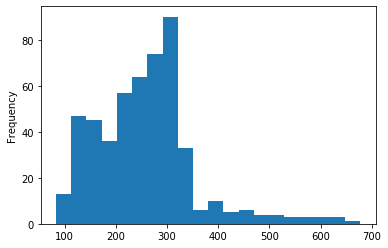

In [11]:
reviews.length.plot(bins=20, kind='hist') 

In [12]:
reviews.length.describe()

count    507.000000
mean     258.960552
std       97.788402
min       83.000000
25%      188.000000
50%      258.000000
75%      304.000000
max      678.000000
Name: length, dtype: float64

In [13]:
print(list(reviews.StemmedTweets[reviews.length > 500].index)) #near the max for length of LemmatizedTweets
print(list(reviews.AutoImmuneDisorder[reviews.length > 500]))

[75, 432, 105, 104, 176, 58, 129, 174, 145, 193, 26, 82, 109, 111, 99, 167, 149]
['Hashimoto_Disease', 'Leukemia_Disease', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia', 'Hashimoto_Disease', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia', 'Celiac_Disease', 'Chron_Disease', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia', 'Fibromyalgia']


Wall time: 484 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F61F5E5240>,
      dtype=object)

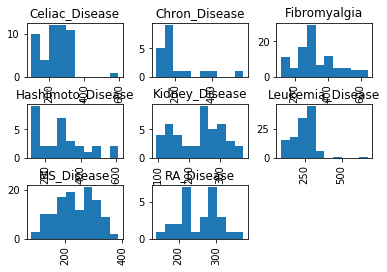

In [14]:
%%time
reviews.hist(column='length', by='AutoImmuneDisorder', bins=10)

In [15]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [16]:


reviews.StemmedTweets.head().apply(split_into_tokens)



407    [medivizor, medivizor, ·, nov, coping, with, c...
196    [medical, news, bulletin, mednewsbulletin, ·, ...
359    [drtharanga, kumari, wickramasooriya, drtharan...
39     [nola, unknown, unknowndiary, ·, sep, replying...
245    [christine, blome, blomechristine, ·, jan, our...
Name: StemmedTweets, dtype: object

In [17]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [18]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [20]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.StemmedTweets.head().apply(split_into_lemmas)

407    [medivizor, medivizor, ·, nov, coping, cml, ch...
196    [medical, news, bulletin, mednewsbulletin, ·, ...
359    [drtharanga, kumari, wickramasooriya, drtharan...
39     [nola, unknown, unknowndiary, ·, sep, replying...
245    [christine, blome, blomechristine, ·, jan, new...
Name: StemmedTweets, dtype: object

In [21]:


%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['StemmedTweets'])
print(len(bow_transformer.vocabulary_))



4585
Wall time: 859 ms


In [22]:
review4 = reviews['StemmedTweets'][42]
print(review4)

purna
purnamusic
·
jun  
gluten shouldnt be so painful no sleep night two advice tried antihistamines ginger tea ibuprofen and activated charcoal over the last  hours unknown treatment


In [23]:


bow4 = bow_transformer.transform([review4])
print(bow4)



  (0, 48)	1
  (0, 83)	1
  (0, 224)	1
  (0, 678)	1
  (0, 1602)	1
  (0, 1622)	1
  (0, 1827)	1
  (0, 2034)	1
  (0, 2298)	1
  (0, 2385)	1
  (0, 2942)	1
  (0, 3086)	1
  (0, 3387)	1
  (0, 3388)	1
  (0, 3732)	1
  (0, 3770)	1
  (0, 4025)	1
  (0, 4183)	1
  (0, 4196)	1
  (0, 4231)	1
  (0, 4290)	1
  (0, 4583)	1


In [24]:
%%time
reviews_bow = bow_transformer.transform(reviews['StemmedTweets'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (507, 4585)
number of non-zeros: 11905
sparsity: 0.51%
Wall time: 734 ms


In [25]:


# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:400]
reviews_bow_test = reviews_bow[400:]
reviews_sentiment_train = reviews['AutoImmuneDisorder'][:400]
reviews_sentiment_test = reviews['AutoImmuneDisorder'][400:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(400, 4585)
(107, 4585)


In [26]:


%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 15.6 ms


In [27]:


print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.AutoImmuneDisorder[42])



predicted: Celiac_Disease
expected: Celiac_Disease


In [28]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['Fibromyalgia' 'Fibromyalgia' 'MS_Disease' 'Leukemia_Disease'
 'MS_Disease' 'Fibromyalgia' 'Leukemia_Disease' 'Kidney_Disease'
 'Hashimoto_Disease' 'Fibromyalgia' 'Fibromyalgia' 'Leukemia_Disease'
 'Fibromyalgia' 'Fibromyalgia' 'MS_Disease' 'MS_Disease' 'MS_Disease'
 'Fibromyalgia' 'Fibromyalgia' 'Leukemia_Disease' 'Leukemia_Disease'
 'Fibromyalgia' 'Fibromyalgia' 'Leukemia_Disease' 'Fibromyalgia'
 'Celiac_Disease' 'Leukemia_Disease' 'Fibromyalgia' 'Leukemia_Disease'
 'Leukemia_Disease' 'Fibromyalgia' 'Leukemia_Disease' 'Leukemia_Disease'
 'MS_Disease' 'MS_Disease' 'Fibromyalgia' 'Leukemia_Disease' 'MS_Disease'
 'MS_Disease' 'Fibromyalgia' 'Hashimoto_Disease' 'MS_Disease' 'MS_Disease'
 'MS_Disease' 'MS_Disease' 'Leukemia_Disease' 'MS_Disease' 'Fibromyalgia'
 'Fibromyalgia' 'Fibromyalgia' 'Fibromyalgia' 'Fibromyalgia' 'MS_Disease'
 'Leukemia_Disease' 'Fibromyalgia' 'MS_Disease' 'Leukemia_Disease'
 'MS_Disease' 'Leukemia_Disease' 'Fibromyalgia' 'MS_Disease' 'MS_Disease'
 'Fibromyalgia' 

In [29]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.6261682242990654
confusion matrix
 [[ 2  0  3  0  0  0  2  0]
 [ 1  0  1  0  0  0  2  1]
 [ 0  0 21  0  0  0  4  0]
 [ 2  0  4  5  0  0  0  0]
 [ 1  0  0  0  1  1  1  0]
 [ 0  0  0  0  0 21  1  0]
 [ 1  0  3  0  0  1 17  0]
 [ 0  0  5  0  0  0  6  0]]
(row=expected, col=predicted)


In [30]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

                   precision    recall  f1-score   support

   Celiac_Disease       0.29      0.29      0.29         7
    Chron_Disease       0.00      0.00      0.00         5
     Fibromyalgia       0.57      0.84      0.68        25
Hashimoto_Disease       1.00      0.45      0.62        11
   Kidney_Disease       1.00      0.25      0.40         4
 Leukemia_Disease       0.91      0.95      0.93        22
       MS_Disease       0.52      0.77      0.62        22
       RA_Disease       0.00      0.00      0.00        11

         accuracy                           0.63       107
        macro avg       0.54      0.44      0.44       107
     weighted avg       0.59      0.63      0.58       107



c:\users\m\anaconda2\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    p = np.around(review_sentiment.predict_proba(new_sample), decimals=2)
    print(new_review, p,'\tMax: ', np.max(p), '\n')

The respective probabilities correspond to those diseases alphebatized as


[[1-Celiac Disease, 2-Chron's Disease, 3-Fibromyalgia, 4-Hashimoto, 5-Kidney Disease, 
  6-Leukemia, 7-Multiple Sclerosis, 8-Rheumatoid Arthritis]]

In [32]:
predict_review('sick. pain. sleepless. anxious.')

predict_review('digestive. hungry.')

predict_review('bruising. sleepy. tired. headache.')
predict_review('energy. crazy. manic. depressed. angry.')

sick. pain. sleepless. anxious. [[0.01 0.   0.89 0.01 0.01 0.01 0.05 0.01]] 	Max:  0.89 

digestive. hungry. [[0.11 0.03 0.19 0.05 0.1  0.24 0.24 0.04]] 	Max:  0.24 

bruising. sleepy. tired. headache. [[0.09 0.08 0.39 0.05 0.08 0.13 0.14 0.04]] 	Max:  0.39 

energy. crazy. manic. depressed. angry. [[0.1  0.05 0.17 0.06 0.1  0.23 0.25 0.05]] 	Max:  0.25 

